In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
pd.set_option('display.max_columns',None)

df_site = pd.read_csv(r"C:\Users\17204\Desktop\Thinkful\Capstone 1_Experimental Design\data\since_1980\SITE_INFO.csv")
df_waterlevel= pd.read_csv(r"C:\Users\17204\Desktop\Thinkful\Capstone 1_Experimental Design\data\since_1980\WATERLEVEL.csv",dtype={"Comment": "string", "Original Direction": "string"})


df_site.info()
df_waterlevel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AgencyCd            299 non-null    object 
 1   SiteNo              299 non-null    int64  
 2   AgencyNm            299 non-null    object 
 3   SiteName            299 non-null    object 
 4   DecLatVa            299 non-null    float64
 5   DecLongVa           299 non-null    float64
 6   HorzDatum           299 non-null    object 
 7   HorzMethod          299 non-null    object 
 8   HorzAcy             299 non-null    object 
 9   AltVa               299 non-null    float64
 10  AltUnits            299 non-null    int64  
 11  AltUnitsNm          299 non-null    object 
 12  AltDatumCd          299 non-null    object 
 13  AltMethod           299 non-null    object 
 14  AltAcy              299 non-null    object 
 15  WellDepth           299 non-null    float64
 16  WellDept

# Data Import and Cleaning
Data is derived from the National Ground-Water Monitoring Network (NGWMN:https://cida.usgs.gov/ngwmn/learnmore.jsp ).  Data is composed of two separate csv files (water levels, well site information).  

In [2]:
# change type of select series to numeric
df_waterlevel['Water level in feet relative to NAVD88'] = pd.to_numeric(df_waterlevel['Water level in feet relative to NAVD88'],errors='coerce')
df_waterlevel['Depth to Water Below Land Surface in ft.'] = pd.to_numeric(df_waterlevel['Depth to Water Below Land Surface in ft.'],errors='coerce')


In [3]:
# Drop columns from waterlevel and site dfs
df_waterlevel= df_waterlevel.drop(columns=['AgencyCd', 'Original Parameter', 'Accuracy Value', 'Original Value', 'Data Provided by', 'Unnamed: 14','Original Direction', 'Original Unit','Accuracy Unit', 'Comment','Observation Method'])
df_site = df_site.drop(columns=['AgencyCd','SiteName','HorzDatum', 'Link', 'AgencyNm','WlSysName','AltAcy','AltUnitsNm','AltMethod','WellDepthUnitsNm','HorzMethod','HorzAcy','AltUnits','AltDatumCd','WellDepthUnits','NatAquiferCd','CountryCd','CountryNm','StateCd','StateNm','CountyCd','LocalAquiferCd','SiteType','QwSnFlag', 'QwSnDesc','QwBaselineFlag','QwBaselineDesc','WlWellChars','WlWellCharsDesc','WlWellType','WlWellPurposeDesc','WlWellPurposeNotes','LithDataProvider','ConstDataProvider','WlWellPurpose','WlWellTypeDesc','WlBaselineDesc','WlBaselineFlag','WlSnDesc','WlSnFlag'])

# Change errors in string objects
df_site['NatAqfrDesc']= df_site['NatAqfrDesc'].replace('Rio Grande aquifersystem', 'Rio Grande aquifer system') 
df_site['LocalAquiferName']= df_site['LocalAquiferName'].replace('Ogallala', 'Ogallala aquifer')
df_site['LocalAquiferName']= df_site['LocalAquiferName'].replace('Ogallala Formation', 'Ogallala aquifer')
df_site['well'] = 'well'

# rename select series
df_waterlevel = df_waterlevel.rename(columns={'Depth to Water Below Land Surface in ft.':'water_depth'})
df_waterlevel = df_waterlevel.rename(columns={'Water level in feet relative to NAVD88':'water_level_elev'})

# convert water depth to negative value
df_waterlevel['water_depth'] = df_waterlevel['water_depth']*-1

# df_site['county'] = df_site["CountyNm"].replace('County', '')
df_site['state'] = df_site["StateNm"]="CO"
df_waterlevel.info()
df_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66460 entries, 0 to 66459
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SiteNo            66460 non-null  int64  
 1   Time              66460 non-null  object 
 2   water_depth       66460 non-null  float64
 3   water_level_elev  66460 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SiteNo            299 non-null    int64  
 1   DecLatVa          299 non-null    float64
 2   DecLongVa         299 non-null    float64
 3   AltVa             299 non-null    float64
 4   WellDepth         299 non-null    float64
 5   NatAqfrDesc       299 non-null    object 
 6   CountyNm          299 non-null    object 
 7   LocalAquiferNam

In [4]:
df_site.head()

,SiteNo,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm
0,704,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
1,149917,38.856533,-102.258965,4126.00,322.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO
2,987,38.903629,-102.054474,3874.25,275.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO
3,993,38.913613,-102.528250,4526.86,222.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO
4,990,38.944447,-102.410469,4384.10,230.0,High Plains aquifer,Cheyenne County,Ogallala aquifer,UNCONFINED,well,CO,CO


In [5]:
# Parse date to just year,month,day 
df_waterlevel['DateEdit'] = df_waterlevel['Time'].str[0:10]
print( df_waterlevel['Time'],df_waterlevel['DateEdit'])

0        1986-12-08T00:00:00-07:00
1        1988-02-18T00:00:00-07:00
2        1989-01-14T00:00:00-07:00
3        1990-01-26T00:00:00-07:00
4        1991-01-17T00:00:00-07:00
                   ...            
66455    2016-01-19T00:00:00-07:00
66456    2017-02-13T00:00:00-07:00
66457    2018-01-29T00:00:00-07:00
66458    2019-02-26T00:00:00-07:00
66459    2020-01-29T00:00:00-07:00
Name: Time, Length: 66460, dtype: object 0        1986-12-08
1        1988-02-18
2        1989-01-14
3        1990-01-26
4        1991-01-17
            ...    
66455    2016-01-19
66456    2017-02-13
66457    2018-01-29
66458    2019-02-26
66459    2020-01-29
Name: DateEdit, Length: 66460, dtype: object


In [6]:
# converting date to datetime series
df_waterlevel['DateEdit'] = pd.to_datetime(df_waterlevel['DateEdit'], format='%Y %m %d', errors = 'coerce')

In [7]:
# Merge datasheets on SiteNo unique identifier
df = pd.merge(df_waterlevel, df_site, on = 'SiteNo', how = 'outer')
df.head()
# df.describe()

,SiteNo,Time,water_depth,water_level_elev,DateEdit,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm
0,704,1986-12-08T00:00:00-07:00,-18.85,3551.12,1986-12-08,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
1,704,1988-02-18T00:00:00-07:00,-19.40,3550.57,1988-02-18,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
2,704,1989-01-14T00:00:00-07:00,-19.60,3550.37,1989-01-14,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
3,704,1990-01-26T00:00:00-07:00,-19.00,3550.97,1990-01-26,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO
4,704,1991-01-17T00:00:00-07:00,-19.40,3550.57,1991-01-17,39.631663,-102.090366,3569.97,62.0,High Plains aquifer,Yuma County,Ogallala aquifer,UNCONFINED,well,CO,CO


In [8]:
# Locate first and last water measurment of water depth for each SiteNo.  Then merge with df.
base_depth_df=df.groupby(['SiteNo'])['water_depth'].nth(0)
latest_depth_df= df.groupby(['SiteNo'])['water_depth'].nth(-1)

df = pd.merge(df,base_depth_df, on = 'SiteNo', how = 'inner')
df= pd.merge(df,latest_depth_df, on = 'SiteNo', how = 'inner')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66460 entries, 0 to 66459
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SiteNo            66460 non-null  int64         
 1   Time              66460 non-null  object        
 2   water_depth_x     66460 non-null  float64       
 3   water_level_elev  66460 non-null  float64       
 4   DateEdit          66460 non-null  datetime64[ns]
 5   DecLatVa          66460 non-null  float64       
 6   DecLongVa         66460 non-null  float64       
 7   AltVa             66460 non-null  float64       
 8   WellDepth         66460 non-null  float64       
 9   NatAqfrDesc       66460 non-null  object        
 10  CountyNm          66460 non-null  object        
 11  LocalAquiferName  66460 non-null  object        
 12  AquiferType       66460 non-null  object        
 13  well              66460 non-null  object        
 14  state             6646

In [9]:
# Number of wellsites prior to date filter
print('Total sites in dataset (all dates):',df.SiteNo.nunique())

Total sites in dataset (all dates): 299


In [10]:
# Locate earliest and latest date for each SiteNo

earliest_date_df= df.groupby(['SiteNo'])['DateEdit'].nth(0)
latest_date_df= df.groupby(['SiteNo'])['DateEdit'].nth(-1)

# Merge earliest and latest dates to df
df = pd.merge(df,earliest_date_df, on = 'SiteNo', how = 'inner')
df= pd.merge(df,latest_date_df, on = 'SiteNo', how = 'inner')

# Rename date start and date end
df = df.rename(columns={'DateEdit_y':'datestart'})
df = df.rename(columns={'DateEdit':'dateend'})
df = df.rename(columns={'DateEdit_x':'DateEdit'})

# Apply df filter to isolate wells with data starting prior to 1981 and ending later than 2019

df = df[(df['datestart']< "1990-01-01") & (df['dateend'] > "2019-01-01")]
print('Total sites with data prior to 1981 and after 2018:', df.SiteNo.nunique())
df.info()

Total sites with data prior to 1981 and after 2018: 213
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18907 entries, 0 to 66448
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SiteNo            18907 non-null  int64         
 1   Time              18907 non-null  object        
 2   water_depth_x     18907 non-null  float64       
 3   water_level_elev  18907 non-null  float64       
 4   DateEdit          18907 non-null  datetime64[ns]
 5   DecLatVa          18907 non-null  float64       
 6   DecLongVa         18907 non-null  float64       
 7   AltVa             18907 non-null  float64       
 8   WellDepth         18907 non-null  float64       
 9   NatAqfrDesc       18907 non-null  object        
 10  CountyNm          18907 non-null  object        
 11  LocalAquiferName  18907 non-null  object        
 12  AquiferType       18907 non-null  object        
 13  well              18

In [11]:
# Add delta depth and total depth change columns

df['delta_base_level']= df['water_depth_x']-df['water_depth_y']
df['total_delta']=df['water_depth']-df['water_depth_y']

# Remove 1 outlier
remove_outliers = df['total_delta'] < 150
df = df[remove_outliers]


In [12]:
# descriptive statistics for just text-based variables
df.describe(include=['O'])

,Time,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm
count,18879,18879,18879,18879,18879,18879,18879,18879
unique,9568,4,22,13,2,1,1,1
top,1985-01-16T12:00:00Z,Rio Grande aquifer system,Conejos County,Cenozoic Erathem,UNCONFINED,well,CO,CO
freq,31,13268,3531,13268,14350,18879,18879,18879


In [13]:
# descriptive statistics for all variables
df.describe(include= 'all')

,SiteNo,Time,water_depth_x,water_level_elev,DateEdit,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm,water_depth_y,water_depth,datestart,dateend,delta_base_level,total_delta
count,1.887900e+04,18879,18879.000000,18879.000000,18879,18879.000000,18879.000000,18879.000000,18879.000000,18879,18879,18879,18879,18879,18879,18879,18879.000000,18879.000000,18879,18879,18879.000000,18879.000000
unique,NaN,9568,NaN,NaN,5439,NaN,NaN,NaN,NaN,4,22,13,2,1,1,1,NaN,NaN,90,67,NaN,NaN
top,NaN,1985-01-16T12:00:00Z,NaN,NaN,1985-01-16 00:00:00,NaN,NaN,NaN,NaN,Rio Grande aquifer system,Conejos County,Cenozoic Erathem,UNCONFINED,well,CO,CO,NaN,NaN,1980-01-08 00:00:00,2020-05-08 00:00:00,NaN,NaN
freq,NaN,31,NaN,NaN,34,NaN,NaN,NaN,NaN,13268,3531,13268,14350,18879,18879,18879,NaN,NaN,2358,2814,NaN,NaN
first,NaN,NaN,NaN,NaN,1980-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-01-01 00:00:00,2019-01-03 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-03-03 00:00:00,2020-05-26 00:00:00,NaN,NaN
mean,2.987707e+14,NaN,-53.517236,6843.515970,NaN,38.100395,-105.296702,6897.020546,323.844271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.224772,-59.008914,NaN,NaN,-2.292464,-7.784142
std,1.510042e+14,NaN,80.515077,1364.083695,NaN,0.966526,1.394104,1318.337877,474.923638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.379252,80.930092,NaN,NaN,13.771225,15.655515
min,1.000000e+00,NaN,-786.100000,3458.670000,NaN,37.001270,-108.545897,3569.970000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-735.400000,-783.220000,NaN,NaN,-97.470000,-82.740000
25%,3.707581e+14,NaN,-79.265000,6209.550000,NaN,37.390563,-106.039470,6282.500000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-83.100000,-83.800000,NaN,NaN,-6.100000,-13.250000


In [14]:
# Create 4 dataframes filtered by decade
df_80_90 = df[df['DateEdit']< "1990-01-01"]
df_90_00 = df[(df['DateEdit']>= "1990-01-01") & (df['DateEdit']< "2000-01-01")]
df_00_10 = df[(df['DateEdit']>= "2000-01-01") & (df['DateEdit']< "2010-01-01")]
df_10_20 = df[(df['DateEdit']>= "2010-01-01") & (df['DateEdit']< "2020-01-01")]

# Total number of measurments for all Sites for each decade
print('1980-1990 measurements:',len(df_80_90[df_80_90.delta_base_level > -500]))
print('1990-2000 measurements:', len(df_90_00[df_90_00.delta_base_level>=-500]))
print('2000-2010 measurements:', len(df_00_10[df_00_10.delta_base_level>=-500]))
print('2010-2020 measurements:', len(df_10_20[df_10_20.delta_base_level>=-500]))


1980-1990 measurements: 3894
1990-2000 measurements: 4919
2000-2010 measurements: 4988
2010-2020 measurements: 4854


# View Well Level Distributions and Stats

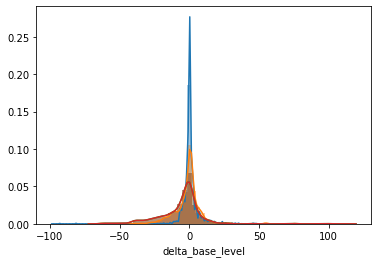

In [15]:
# Historgram plot of change in water levels sorted by decade

site_80_90= df_80_90.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_80_90['delta_base_level'], bins=50)
site_90_00= df_90_00.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_90_00['delta_base_level'], bins=50)
site_00_10= df_00_10.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_00_10['delta_base_level'], bins=50)
site_10_20= df_10_20.groupby([pd.Grouper(key ='DateEdit',freq = '1Y'), 'SiteNo']).delta_base_level.mean().reset_index()
ax = sns.distplot(site_00_10['delta_base_level'], bins=50)


In [16]:
# Stats for change in water level for each decade
print('1980-1990:',stats.describe(df_80_90['delta_base_level']))
print('1990-2000:',stats.describe(df_90_00['delta_base_level']))
print('2000-2010:',stats.describe(df_00_10['delta_base_level']))
print('2010-2020:',stats.describe(df_10_20['delta_base_level']))

1980-1990: DescribeResult(nobs=3894, minmax=(-97.47, 83.47999999999999), mean=1.9847380585516181, variance=54.889201100133505, skewness=-0.8964016675635303, kurtosis=40.208876426032134)
1990-2000: DescribeResult(nobs=4919, minmax=(-65.03, 86.75999999999999), mean=0.4649400284610697, variance=88.37659474528434, skewness=-0.2091493635550182, kurtosis=13.279050647146377)
2000-2010: DescribeResult(nobs=4988, minmax=(-72.0, 112.69999999999999), mean=-4.720583400160385, variance=188.9721772212363, skewness=0.8598838774978262, kurtosis=15.092247103653627)
2010-2020: DescribeResult(nobs=4854, minmax=(-80.04000000000002, 111.30000000000001), mean=-5.737391841779974, variance=359.48059451488086, skewness=1.934998053956793, kurtosis=11.584681768125149)


# Inital Comparison:  1980-1990, 2010-2020 Water Levels

In [17]:
# Calculate difference in means with 95% confidence

import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+" feet.")
get_95_ci(df_80_90['delta_base_level'], df_10_20['delta_base_level'])


'The difference in means at the 95% confidence interval (two-tail) is between -8.30406994505066 and -7.140189855612525 feet.'

# Perform T-Test
Results indicate well depth distributions from 1980-1990 differ signifcantly from well depth distributions from 2010-2020.  

In [18]:
# Comparing water levels changes from 1980-1990 to water level changes 2010-2020
stats.ttest_ind(df_80_90['delta_base_level'], df_10_20['delta_base_level'])
# This T-Test is > 1.96 and the p-value is < .05, indicating there is significant difference in sample distributions

Ttest_indResult(statistic=23.98844088463207, pvalue=3.2927719109466786e-123)

# Test of Normal Distribution: Shapiro Wilk
Based on Shapiro Wilk test results, distributions of changes in water levels from 1980 to 1990 and 2010 to 2020 are not normally distributed (ie. p-values is not less than 0.05 and W is not close to 1).  Therefore the above T-Test is not a valid test to discern whether early water depth measurments are significantly different thand later water depth measurments.  



In [19]:
print(stats.shapiro(df_80_90['delta_base_level']))
print(stats.shapiro(df_90_00['delta_base_level']))
print(stats.shapiro(df_00_10['delta_base_level']))
print(stats.shapiro(df_10_20['delta_base_level']))

(0.7202528715133667, 0.0)
(0.8373647928237915, 0.0)
(0.8006992936134338, 0.0)
(0.7706420421600342, 0.0)


# Test Non-Normal Distribution: Kruskal
Because the distributions tested as non-normal, a Kruskal test is performed.  The results of this test (very low p-value) indicated we can reject the null that all variables have the same distribution.  

In [20]:
stats.kruskal(df_80_90['delta_base_level'], df_10_20['delta_base_level'])
# run kruskal for every sequential decade
# report median difference for each group
# when in doubt use median. 
# run normal-nonnormal test and perform statistical significance for location based groups

KruskalResult(statistic=1659.8354181757772, pvalue=0.0)

In [21]:
stats.kruskal(df_80_90['delta_base_level'], df_90_00['delta_base_level'])
# Low p-value = statistically significant difference

KruskalResult(statistic=7.496030143736, pvalue=0.006183514974416389)

In [22]:
stats.kruskal(df_90_00['delta_base_level'], df_00_10['delta_base_level'])
# Low p-value = statistically significant difference

KruskalResult(statistic=867.8539777240425, pvalue=9.552585436296986e-191)

In [23]:
stats.kruskal(df_00_10['delta_base_level'], df_10_20['delta_base_level'])
# High p-value, not significantly different

KruskalResult(statistic=76.51525228406672, pvalue=2.1851874786836056e-18)

# Summary Point Plot by Decade

[[Text(0, 0, '1980-1990'),
  Text(0, 0, '1990-2000'),
  Text(0, 0, '2000-2010'),
  Text(0, 0, '2010-2020')]]

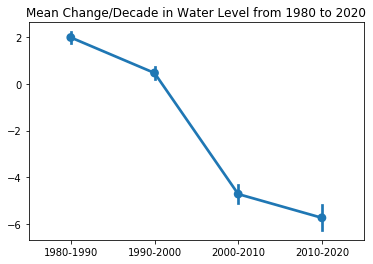

In [24]:
# The point plot below shows, on average, ground water levels began to decrease in level between 2000-2010, and have continued to decrease to 2020
g = sns.pointplot(data=[df_80_90['delta_base_level'],df_90_00['delta_base_level'],df_00_10['delta_base_level'],
                        df_10_20['delta_base_level']],)
plt.title('Mean Change/Decade in Water Level from 1980 to 2020')
g.set(xticklabels = ['1980-1990','1990-2000','2000-2010', '2010-2020'])

# Use median for non-normal distribution, use mean for normal.  For median, may need to just hand code it. 

# Median Plots per decade

The Median Change from 1980-1990 to 1990-2000 is 0.33000000000000007 feet 
The Median Change from 1990-2000 to 2000-2010 is -3.135 feet 
The Median Change from 2000-2010 to 2010-2020 is -1.5749999999999975 feet 
The Total Median Change from 1980-1990 to 2010-2020 is -4.379999999999997 feet 


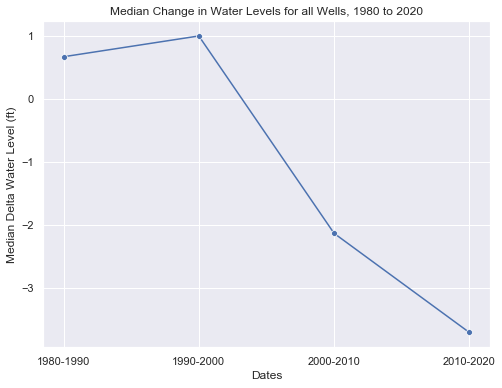

In [25]:
medians = []
m1 = df_80_90['delta_base_level'].median()
medians.append(m1)
m2 = df_90_00['delta_base_level'].median()
medians.append(m2)
m3 = df_00_10['delta_base_level'].median()
medians.append(m3)
m4 = df_10_20['delta_base_level'].median()
medians.append(m4)
dates = ['1980-1990','1990-2000','2000-2010', '2010-2020']
# ma
m = {'medians':medians, 'dates':dates}
median_df = pd.DataFrame(m)

sns.set(style='darkgrid')
sns.lineplot(x='dates', y='medians',marker="o", data=median_df)
plt.title('Median Change in Water Levels for all Wells, 1980 to 2020')
plt.xlabel('Dates')
plt.ylabel('Median Delta Water Level (ft)')
plt.gcf().set_size_inches(8,6)

print("The Median Change from 1980-1990 to 1990-2000 is {} feet ".format(m2-m1))
print("The Median Change from 1990-2000 to 2000-2010 is {} feet ".format(m3-m2))
print("The Median Change from 2000-2010 to 2010-2020 is {} feet ".format(m4-m3))
print("The Total Median Change from 1980-1990 to 2010-2020 is {} feet ".format(m4-m1))


# Comparison of Aquifer Systems 

In [26]:
# Create 4 dataframes filtered by decade
dfcp_80_90 = df[(df['NatAqfrDesc']== "Colorado Plateaus aquifers") & (df['DateEdit'] < "1990-01-01")]
dfcp_90_00 = df[(df['NatAqfrDesc']== "Colorado Plateaus aquifers")& (df['DateEdit'] >= "1990-01-01") & (df['DateEdit']< "2000-01-01")]
dfcp_00_10 = df[(df['NatAqfrDesc']== "Colorado Plateaus aquifers") & (df['DateEdit']>="2000-01-01") & (df['DateEdit']< "2010-01-01")]
dfcp_10_20 = df[(df['NatAqfrDesc']=="Colorado Plateaus aquifers") & (df['DateEdit'] >="2010-01-01") & (df['DateEdit']< "2020-01-01")]

dfrg_80_90 = df[(df['NatAqfrDesc']== "Rio Grande aquifer system") & (df['DateEdit'] < "1990-01-01")]
dfrg_90_00 = df[(df['NatAqfrDesc']== "Rio Grande aquifer system")& (df['DateEdit'] >= "1990-01-01") & (df['DateEdit']< "2000-01-01")]
dfrg_00_10 = df[(df['NatAqfrDesc']== "Rio Grande aquifer system") & (df['DateEdit']>="2000-01-01") & (df['DateEdit']< "2010-01-01")]
dfrg_10_20 = df[(df['NatAqfrDesc']=="Rio Grande aquifer system") & (df['DateEdit'] >="2010-01-01") & (df['DateEdit']< "2020-01-01")]

dfhp_80_90 = df[(df['NatAqfrDesc']== "High Plains aquifer") & (df['DateEdit'] < "1990-01-01")]
dfhp_90_00 = df[(df['NatAqfrDesc']== "High Plains aquifer")& (df['DateEdit'] >= "1990-01-01") & (df['DateEdit']< "2000-01-01")]
dfhp_00_10 = df[(df['NatAqfrDesc']== "High Plains aquifer") & (df['DateEdit']>= "2000-01-01") & (df['DateEdit']< "2010-01-01")]
dfhp_10_20 = df[(df['NatAqfrDesc']== "High Plains aquifer") & (df['DateEdit']>= "2010-01-01") & (df['DateEdit']< "2020-01-01")]

dfdb_80_90 = df[(df['NatAqfrDesc']== "Denver Basin aquifer system") & (df['DateEdit'] < "1990-01-01")]
dfdb_90_00 = df[(df['NatAqfrDesc']== "Denver Basin aquifer system")& (df['DateEdit'] >= "1990-01-01") & (df['DateEdit']< "2000-01-01")]
dfdb_00_10 = df[(df['NatAqfrDesc']== "Denver Basin aquifer system") & (df['DateEdit']>="2000-01-01") & (df['DateEdit']< "2010-01-01")]
dfdb_10_20 = df[(df['NatAqfrDesc']=="Denver Basin aquifer system") & (df['DateEdit'] >="2010-01-01") & (df['DateEdit']< "2020-01-01")]



# Total number of measurments for all Sites for each decade
print('Colorado Plateau 1980-1990 measurements:', len(dfcp_80_90[dfcp_80_90.delta_base_level > -500]))
print('Colorado Plateau 1990-2000 measurements:', len(dfcp_90_00[dfcp_90_00.delta_base_level>=-500]))
print('Colorado Plateau 2000-2010 measurements:', len(dfcp_00_10[dfcp_00_10.delta_base_level>=-500]))
print('Colorado Plateau 2010-2020 measurements:', len(dfcp_10_20[dfcp_10_20.delta_base_level>=-500]))

print('Rio Grande aquifer system 1980-1990 measurements:', len(dfrg_80_90[dfrg_80_90.delta_base_level > -500]))
print('Rio Grande aquifer system 1990-2000 measurements:', len(dfrg_90_00[dfrg_90_00.delta_base_level>=-500]))
print('Rio Grande aquifer system 2000-2010 measurements:', len(dfrg_00_10[dfrg_00_10.delta_base_level>=-500]))
print('Rio Grande aquifer system 2010-2020 measurements:', len(dfrg_10_20[dfrg_10_20.delta_base_level>=-500]))

print('High Plains 1980-1990 measurements:', len(dfhp_80_90[dfhp_80_90.delta_base_level > -500]))
print('High Plains 1990-2000 measurements:', len(dfhp_90_00[dfhp_90_00.delta_base_level>=-500]))
print('High Plains 2000-2010 measurements:', len(dfhp_00_10[dfhp_00_10.delta_base_level>=-500]))
print('High Plains 2010-2020 measurements:', len(dfhp_10_20[dfhp_10_20.delta_base_level>=-5000]))

print('Denver Basin 1980-1990 measurements:', len(dfcp_80_90[dfcp_80_90.delta_base_level > -500]))
print('Denver Basin 1990-2000 measurements:', len(dfcp_90_00[dfcp_90_00.delta_base_level>=-500]))
print('Denver Basin 2000-2010 measurements:', len(dfcp_00_10[dfcp_00_10.delta_base_level>=-500]))
print('Denver Basin 2010-2020 measurements:', len(dfcp_10_20[dfcp_10_20.delta_base_level>=-500]))

Colorado Plateau 1980-1990 measurements: 192
Colorado Plateau 1990-2000 measurements: 185
Colorado Plateau 2000-2010 measurements: 172
Colorado Plateau 2010-2020 measurements: 183
Rio Grande aquifer system 1980-1990 measurements: 2810
Rio Grande aquifer system 1990-2000 measurements: 3398
Rio Grande aquifer system 2000-2010 measurements: 3562
Rio Grande aquifer system 2010-2020 measurements: 3315
High Plains 1980-1990 measurements: 595
High Plains 1990-2000 measurements: 842
High Plains 2000-2010 measurements: 822
High Plains 2010-2020 measurements: 807
Denver Basin 1980-1990 measurements: 192
Denver Basin 1990-2000 measurements: 185
Denver Basin 2000-2010 measurements: 172
Denver Basin 2010-2020 measurements: 183


Shapiro Wilk test for normality for all aquifers

In [27]:
print("Colorado Plateau",stats.shapiro(dfcp_80_90['delta_base_level']))
print(stats.shapiro(dfcp_90_00['delta_base_level']))
print(stats.shapiro(dfcp_00_10['delta_base_level']))
print(stats.shapiro(dfcp_10_20['delta_base_level']))

print("Rio Grande",stats.shapiro(dfrg_80_90['delta_base_level']))
print(stats.shapiro(dfrg_90_00['delta_base_level']))
print(stats.shapiro(dfrg_00_10['delta_base_level']))
print(stats.shapiro(dfrg_10_20['delta_base_level']))

print("High Plains",stats.shapiro(dfhp_80_90['delta_base_level']))
print(stats.shapiro(dfhp_90_00['delta_base_level']))
print(stats.shapiro(dfhp_00_10['delta_base_level']))
print(stats.shapiro(dfhp_10_20['delta_base_level']))

print("Denver Basin",stats.shapiro(dfdb_80_90['delta_base_level']))
print(stats.shapiro(dfdb_90_00['delta_base_level']))
print(stats.shapiro(dfdb_00_10['delta_base_level']))
print(stats.shapiro(dfdb_10_20['delta_base_level']))

Colorado Plateau (0.5379059314727783, 2.753872273141736e-22)
(0.889064371585846, 1.733369836554033e-10)
(0.871660590171814, 5.907688921391596e-11)
(0.8982357978820801, 7.081938369069007e-10)
Rio Grande (0.8266723155975342, 0.0)
(0.9264701008796692, 6.076605234202166e-38)
(0.917517364025116, 2.205251419277251e-40)
(0.8358801603317261, 0.0)
High Plains (0.8937615156173706, 7.563300081484466e-20)
(0.9799339771270752, 2.371177254545387e-09)
(0.9720752239227295, 1.945316477347525e-11)
(0.9653216600418091, 6.532391272871807e-13)
Denver Basin (0.8210930228233337, 7.92446967759681e-18)
(0.9282621145248413, 1.2445979407401785e-14)
(0.811865508556366, 4.3847060057395e-22)
(0.6711961030960083, 3.1582556854898583e-31)


In [28]:
# comparison of 4 aquifers from early time to late.  All significantly different excep for colorado plateau system
print(stats.kruskal(dfcp_80_90['delta_base_level'], dfcp_10_20['delta_base_level']))
print(stats.kruskal(dfrg_80_90['delta_base_level'], dfrg_10_20['delta_base_level']))
print(stats.kruskal(dfhp_80_90['delta_base_level'], dfhp_10_20['delta_base_level']))
print(stats.kruskal(dfdb_80_90['delta_base_level'], dfdb_10_20['delta_base_level']))



KruskalResult(statistic=1.872182548077246, pvalue=0.17122531877965497)
KruskalResult(statistic=1833.0678135830476, pvalue=0.0)
KruskalResult(statistic=267.2893733068583, pvalue=4.4227193308521e-60)
KruskalResult(statistic=12.36454265966526, pvalue=0.00043756473752186393)


Rio Grande Aquifer

In [29]:
print(stats.kruskal(dfrg_80_90['delta_base_level'], dfrg_90_00['delta_base_level']))
print(stats.kruskal(dfrg_90_00['delta_base_level'], dfrg_00_10['delta_base_level']))
print(stats.kruskal(dfrg_00_10['delta_base_level'], dfrg_10_20['delta_base_level']))


KruskalResult(statistic=11.880037532915065, pvalue=0.0005673879789368072)
KruskalResult(statistic=1319.5834484649527, pvalue=6.27318504554169e-289)
KruskalResult(statistic=189.24863096318217, pvalue=4.638102461624089e-43)


The Median Change from 1980-1990 to 1990-2000 is 0.3949999999999987 feet 
The Median Change from 1990-2000 to 2000-2010 is 4.379999999999999 feet 
The Median Change from 2000-2010 to 2010-2020 is 1.6799999999999997 feet 
The Median Change from 1980-1990 to 2010-2020 is 10.730000000000018 feet 


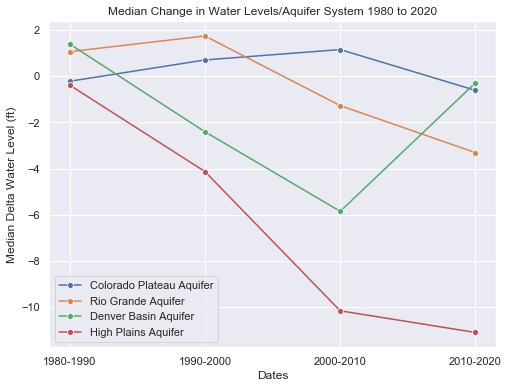

In [30]:
medians_dfcp = []
m1 = dfcp_80_90['delta_base_level'].median()
medians_dfcp.append(m1)
m2 = dfcp_90_00['delta_base_level'].median()
medians_dfcp.append(m2)
m3 = dfcp_00_10['delta_base_level'].median()
medians_dfcp.append(m3)
m4 = dfcp_10_20['delta_base_level'].median()
medians_dfcp.append(m4)
dates_dfcp = ['1980-1990','1990-2000','2000-2010', '2010-2020']


print("The Median Change from 1980-1990 to 1990-2000 is {} feet ".format(m1-m4))

m_cp = {'medians':medians_dfcp, 'dates':dates_dfcp}
medians_dfcp = pd.DataFrame(m_cp)

sns.set(style='darkgrid')
sns.lineplot(x='dates', y='medians',marker="o", data=medians_dfcp)


medians_dfrg = []
m1 = dfrg_80_90['delta_base_level'].median()
medians_dfrg.append(m1)
m2 = dfrg_90_00['delta_base_level'].median()
medians_dfrg.append(m2)
m3 = dfrg_00_10['delta_base_level'].median()
medians_dfrg.append(m3)
m4 = dfrg_10_20['delta_base_level'].median()
medians_dfrg.append(m4)
dates_dfrg = ['1980-1990','1990-2000','2000-2010', '2010-2020']

print("The Median Change from 1990-2000 to 2000-2010 is {} feet ".format(m1-m4))

m = {'medians':medians_dfrg, 'dates':dates_dfrg}
medians_dfrg = pd.DataFrame(m)

sns.set(style='darkgrid')
sns.lineplot(x='dates', y='medians',marker="o", data=medians_dfrg)

medians_dfdb = []
m1 = dfdb_80_90['delta_base_level'].median()
medians_dfdb.append(m1)
m2 = dfdb_90_00['delta_base_level'].median()
medians_dfdb.append(m2)
m3 = dfdb_00_10['delta_base_level'].median()
medians_dfdb.append(m3)
m4 = dfdb_10_20['delta_base_level'].median()
medians_dfdb.append(m4)
dates_dfdb = ['1980-1990','1990-2000','2000-2010', '2010-2020']

print("The Median Change from 2000-2010 to 2010-2020 is {} feet ".format(m1-m4))

m_db = {'medians':medians_dfdb, 'dates':dates_dfdb}
medians_dfdb = pd.DataFrame(m_db)
sns.set(style='darkgrid')
sns.lineplot(x='dates', y='medians',marker="o", data=medians_dfdb)

medians_dfhp = []
m1 = dfhp_80_90['delta_base_level'].median()
medians_dfhp.append(m1)
m2 = dfhp_90_00['delta_base_level'].median()
medians_dfhp.append(m2)
m3 = dfhp_00_10['delta_base_level'].median()
medians_dfhp.append(m3)
m4 = dfhp_10_20['delta_base_level'].median()
medians_dfhp.append(m4)
dates_dfhp = ['1980-1990','1990-2000','2000-2010', '2010-2020']

print("The Median Change from 1980-1990 to 2010-2020 is {} feet ".format(m1-m4))

m_hp = {'medians':medians_dfhp, 'dates':dates_dfhp}
medians_dfhp = pd.DataFrame(m_hp)

sns.set(style='darkgrid')
sns.lineplot(x='dates', y='medians',marker="o", data=medians_dfhp)

plt.legend(labels=['Colorado Plateau Aquifer','Rio Grande Aquifer', 'Denver Basin Aquifer', 'High Plains Aquifer'])
plt.title('Median Change in Water Levels/Aquifer System 1980 to 2020')
plt.xlabel('Dates')
plt.ylabel('Median Delta Water Level (ft)')
plt.gcf().set_size_inches(8,6)

In [31]:
medians_dfhp

,medians,dates
0,-0.38,1980-1990
1,-4.13,1990-2000
2,-10.17,2000-2010
3,-11.11,2010-2020


High Plains Aquifer

In [32]:
print(stats.kruskal(dfhp_80_90['delta_base_level'], dfhp_90_00['delta_base_level']))
print(stats.kruskal(dfhp_90_00['delta_base_level'], dfhp_00_10['delta_base_level']))
print(stats.kruskal(dfhp_00_10['delta_base_level'], dfhp_10_20['delta_base_level']))


KruskalResult(statistic=107.39980976177584, pvalue=3.6384154658606155e-25)
KruskalResult(statistic=86.58914797949348, pvalue=1.3357812660792535e-20)
KruskalResult(statistic=12.773239363853982, pvalue=0.00035161340527070927)


Denver Basin Aquifer

In [33]:
print(stats.kruskal(dfdb_80_90['delta_base_level'], dfdb_90_00['delta_base_level']))
print(stats.kruskal(dfdb_90_00['delta_base_level'], dfdb_00_10['delta_base_level']))
print(stats.kruskal(dfdb_00_10['delta_base_level'], dfdb_10_20['delta_base_level']))


KruskalResult(statistic=65.94014270830534, pvalue=4.648273522965234e-16)
KruskalResult(statistic=6.640543829068717, pvalue=0.009968350016566452)
KruskalResult(statistic=32.993370730734476, pvalue=9.247364799725704e-09)




# Plots of Ground Water Change Through Time
Below is a series of groundwater plots grouped by well site with values averaged on 2 year intervals.  

In [34]:
# Group by site and take mean value for every 2 years
site_group= df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'SiteNo']).delta_base_level.mean().reset_index()

[[Text(0, 0, '1980-1990'),
  Text(0, 0, '1990-2000'),
  Text(0, 0, '2000-2010'),
  Text(0, 0, '2010-2020')]]

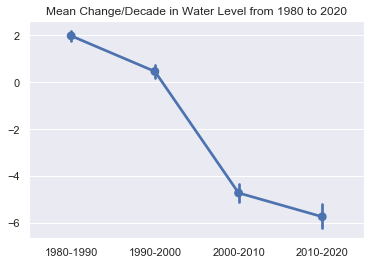

In [35]:
# The point plot below shows, on average, ground water levels began to decrease in level between 2000-2010, and have continued to decrease to 2020
g = sns.pointplot(data=[df_80_90['delta_base_level'],df_90_00['delta_base_level'],df_00_10['delta_base_level'],
                        df_10_20['delta_base_level']],)
plt.title('Mean Change/Decade in Water Level from 1980 to 2020')
g.set(xticklabels = ['1980-1990','1990-2000','2000-2010', '2010-2020'])

# Average Water Level Changes 1980-2020: All Wells
On average water levels began to decrease between 1995-2000, and generally continued decreasing to 2020.  Total decrease is ~10'.  

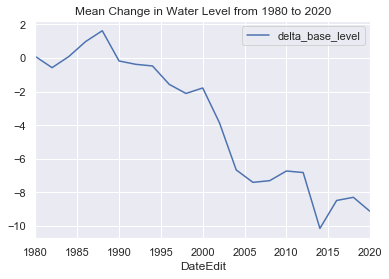

In [36]:
fig = site_group[site_group.delta_base_level>=-500][
    ['DateEdit', 'delta_base_level']].groupby('DateEdit').mean().plot()
plt.title('Mean Change in Water Level from 1980 to 2020')
plt.show()

# Water Level Changes 1980-2020: All Wells
Although most wells show a decrease in water levels through time, some are flat or have increased since 1980.  

Text(0.5, 1.0, 'Change in Ground Water Levels/Well Site 1980 to 2020')

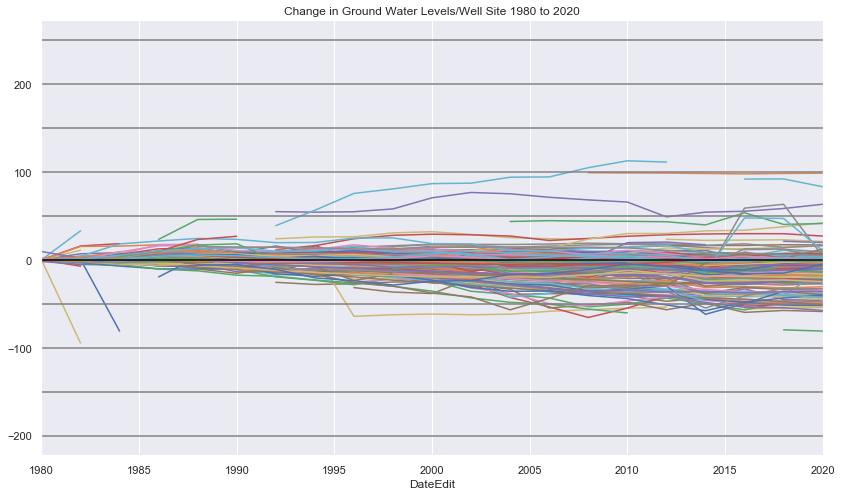

In [37]:
# View ground water change from 1980-2020 for all well sites
ax = site_group.pivot('DateEdit','SiteNo','delta_base_level').plot()
ax.legend_.remove()

plt.gcf().set_size_inches(14,8)
ax.axhline(250, color ='gray')
ax.axhline(200, color ='gray')
ax.axhline(150, color ='gray')
ax.axhline(100,color ='gray')
ax.axhline(50, color ='gray')
ax.axhline(0, color ='black')
ax.axhline(-50,color ='gray')
ax.axhline(-100, color ='gray')
ax.axhline(-150,color ='gray')
ax.axhline(-200,color ='gray')
plt.title('Change in Ground Water Levels/Well Site 1980 to 2020')


# Water Level Change: Aquifer System

,NatAqfrDesc,count,mean,std,min,25%,50%,75%,max
0,Colorado Plateaus aquifers,732.0,2.940970,27.734763,-54.32,-6.41,-0.59,9.06,83.20
1,Denver Basin aquifer system,1772.0,1.708651,22.065873,-20.69,-5.06,-0.48,4.38,98.80
2,High Plains aquifer,3107.0,-19.228346,22.663609,-82.74,-39.50,-13.49,-2.98,41.19
3,Rio Grande aquifer system,13268.0,-6.963738,8.449595,-34.90,-12.06,-4.81,-0.58,41.34


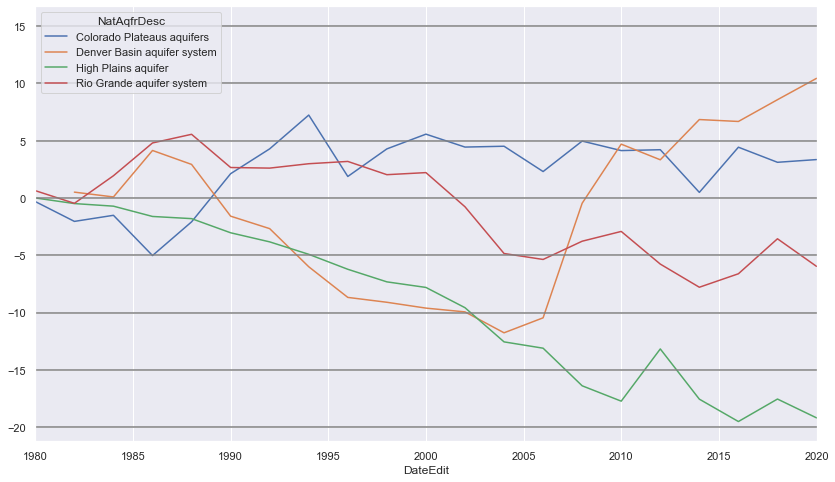

In [38]:
# Group by Geographic Aquifer System
aqfr_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'NatAqfrDesc']).delta_base_level.mean().reset_index()# Plot change in ground water levels 1980-2020 grouped by Geographic Aquifer System
ax =aqfr_group.pivot('DateEdit','NatAqfrDesc','delta_base_level').plot()
plt.gcf().set_size_inches(14,8)
ax.axhline(0, color ='gray')
ax.axhline(-5, color ='gray')
ax.axhline(-10, color ='gray')
ax.axhline(-15, color ='gray')
ax.axhline(5, color ='gray')
ax.axhline(10, color ='gray')
ax.axhline(15, color ='gray')
ax.axhline(-20, color ='gray')

aquifer= df.groupby(['NatAqfrDesc']).total_delta.describe().reset_index()
aquifer.head(30)

# Water Level Change: Aquifer Formation 

,LocalAquiferName,count,mean,std,min,25%,50%,75%,max
10,Ogallala aquifer,3107.0,-19.228346,2.266361e+01,-82.74,-39.50,-13.49,-2.98,41.19
6,Fruitland Aquifer,39.0,-8.400000,1.799578e-15,-8.40,-8.40,-8.40,-8.40,-8.40
1,Cenozoic Erathem,13268.0,-6.963738,8.449595e+00,-34.90,-12.06,-4.81,-0.58,41.34
11,San Jose Aquifer,23.0,-6.410000,2.724420e-15,-6.41,-6.41,-6.41,-6.41,-6.41
0,Arapahoe Conglomerate Member of Laramie Formation,622.0,-5.451897,1.083876e+01,-20.69,-20.69,-0.48,4.38,4.38
8,Lower Piceance Basin Aquifer,194.0,-3.014691,2.456308e+01,-47.82,-2.99,-0.59,9.06,27.01
7,Laramie Formation,214.0,-1.860000,0.000000e+00,-1.86,-1.86,-1.86,-1.86,-1.86
5,Fox Hills Formation,423.0,0.571655,5.651669e+00,-5.06,-5.06,-5.06,6.23,6.23
3,Dawson Arkose,228.0,1.620000,3.115464e-15,1.62,1.62,1.62,1.62,1.62
12,Upper Piceance Basin Aquifer,356.0,6.461742,2.330015e+01,-26.88,-5.10,-2.54,9.97,63.25


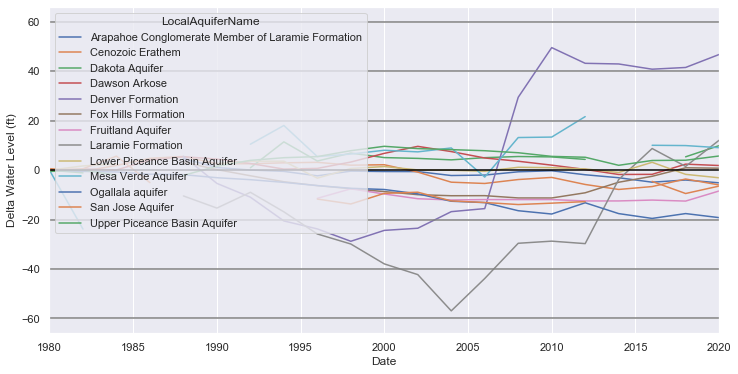

In [39]:

# Group by aquifer formation
aqfr_formation_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'LocalAquiferName']).delta_base_level.mean().reset_index()
aqfr_formation_group.groupby(['LocalAquiferName']).agg(['count'])


# # Plot change in ground water levels 1980-2020 grouped by aquifer formation
ax =aqfr_formation_group.pivot('DateEdit','LocalAquiferName','delta_base_level').plot()
plt.gcf().set_size_inches(12,6)
plt.ylabel('Delta Water Level (ft)')
plt.xlabel('Date')

ax.axhline(0, color ='black')
ax.axhline(-20, color ='gray')
ax.axhline(-40, color ='gray')
ax.axhline(-60, color ='gray')
ax.axhline(20, color ='gray')
ax.axhline(40, color ='gray')
ax.axhline(60, color ='gray')


# Total Change in Ground Water Levels
aquifer_formation= df.groupby(['LocalAquiferName']).total_delta.describe().reset_index()
aquifer_formation.sort_values(by='mean', ascending = True)
# aquifer_formation.head(15)

# Water Level Change: County

,CountyNm,count,mean,std,min,25%,50%,75%,max
14,Phillips County,310.0,-31.175903,1.844583e+01,-54.62,-49.95,-39.50,-16.44,-2.98
21,Yuma County,748.0,-29.195455,1.640832e+01,-54.16,-41.68,-33.58,-18.24,1.60
20,Washington County,528.0,-23.174602,2.401337e+01,-58.83,-51.10,-7.10,-3.50,4.00
3,Cheyenne County,202.0,-22.949059,3.368083e+01,-82.74,-46.77,-7.35,0.29,19.67
2,Baca County,88.0,-20.827159,1.123520e+01,-31.49,-31.49,-27.36,-6.56,-6.56
5,Costilla County,1859.0,-15.952717,1.338854e+01,-34.90,-28.12,-13.91,-4.57,41.34
9,Kit Carson County,711.0,-14.227398,1.944919e+01,-57.55,-33.34,-7.60,0.36,15.99
17,Rio Grande County,1721.0,-10.522266,6.017628e+00,-21.38,-16.45,-13.18,-5.75,-0.28
19,Sedgwick County,113.0,-9.993894,2.201248e+00,-11.60,-11.60,-11.27,-6.66,-6.66
18,Saguache County,3298.0,-8.610346,5.666284e+00,-26.68,-10.74,-9.22,-3.70,3.01


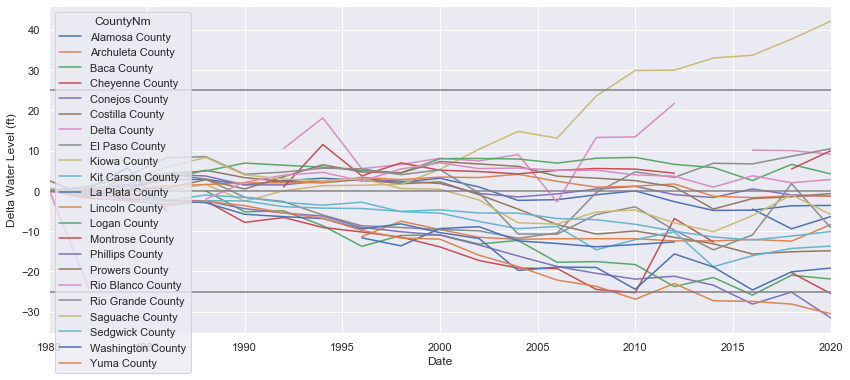

In [40]:
# Group by Colorado County and plot change in ground water depth through time
county_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'CountyNm']).delta_base_level.mean().reset_index()
county_group.tail(10)

ax = county_group.pivot('DateEdit','CountyNm','delta_base_level').plot()
plt.gcf().set_size_inches(14,6)
plt.ylabel('Delta Water Level (ft)')
plt.xlabel('Date')
ax.axhline(0, color ='gray')
ax.axhline(25, color ='gray')
ax.axhline(-25, color ='gray')


county= df.groupby(['CountyNm']).total_delta.describe().reset_index()
county.sort_values(by='mean', ascending = True)
# county.head(30)



,AquiferType,count,mean,std,min,25%,50%,75%,max
0,CONFINED,4529.0,-4.545699,16.004595,-47.82,-10.69,-5.06,-0.92,98.8
1,UNCONFINED,14350.0,-8.806226,15.403563,-82.74,-13.44,-4.57,-0.09,83.2


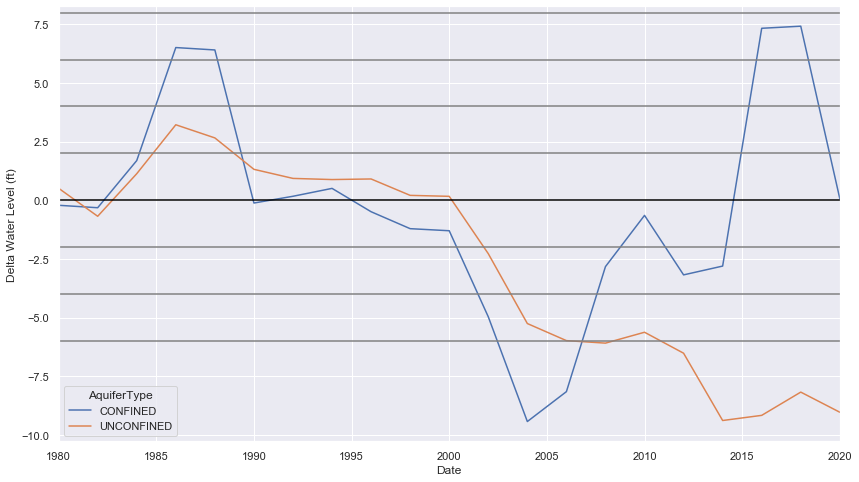

In [41]:
# Group by aquifer type and plot change in ground water depth through time for Confined and Unconfined aquifers
county_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'AquiferType']).delta_base_level.mean().reset_index()
county_group.tail(10)

ax=county_group.pivot('DateEdit','AquiferType','delta_base_level').plot()
plt.gcf().set_size_inches(14,8)
plt.ylabel('Delta Water Level (ft)')
plt.xlabel('Date')
ax.axhline(0, color ='black')
ax.axhline(-2, color ='gray')
ax.axhline(-4, color ='gray')
ax.axhline(-6, color ='gray')
ax.axhline(2, color ='gray')
ax.axhline(4, color ='gray')
ax.axhline(6, color ='gray')
ax.axhline(8, color ='gray')


aqftype= df.groupby(['AquiferType']).total_delta.describe().reset_index()
aqftype.head(30)


# Analysis of ground water level change from first measurement to last measurement for each well site
Due to changes in the data sampling frequency, it is necessary to analyze water depths for individual well sites through comparison of the first to the last well level values.  This will remove statisical weighting of wells which have a high sample frequency.  

In [42]:
# Record first a last measurment depths for each well site
df_first= df.groupby(['SiteNo']).water_depth_x.first().reset_index()
df_last = df.groupby(['SiteNo']).water_depth_x.last().reset_index()
df_start = df.groupby(['SiteNo']).datestart.first().reset_index()

# Merge to df 

df_merge = pd.merge(df_first,df_last, on='SiteNo', how = 'inner')
df_merge = pd.merge(df_merge,df_start, on ='SiteNo', how = 'inner')
df_merge = pd.merge(df_merge, df_site, on='SiteNo', how = 'inner')
df_merge

,SiteNo,water_depth_x_x,water_depth_x_y,datestart,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm
0,1,-27.32,-35.72,1983-05-26,37.159257,-107.314668,6551.6,47.0,Colorado Plateaus aquifers,Archuleta County,Fruitland Aquifer,UNCONFINED,well,CO,CO
1,2,-27.23,-33.64,1980-08-13,37.159407,-107.678401,6638.9,502.0,Colorado Plateaus aquifers,La Plata County,San Jose Aquifer,UNCONFINED,well,CO,CO
2,3,-42.61,-32.66,1980-08-12,38.200788,-108.196275,7835.0,80.0,Colorado Plateaus aquifers,Montrose County,Dakota Aquifer,CONFINED,well,CO,CO
3,9,-27.72,-32.82,1980-09-22,40.124424,-108.418143,5977.9,1025.0,Colorado Plateaus aquifers,Rio Blanco County,Upper Piceance Basin Aquifer,UNCONFINED,well,CO,CO
4,16,-413.50,-350.25,1980-09-22,39.920914,-108.218410,7128.6,895.0,Colorado Plateaus aquifers,Rio Blanco County,Upper Piceance Basin Aquifer,UNCONFINED,well,CO,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,385111104214403,-88.16,-83.78,1987-04-03,38.858250,-104.362117,6035.7,324.0,Denver Basin aquifer system,El Paso County,Arapahoe Conglomerate Member of Laramie Formation,CONFINED,well,CO,CO
208,385323104224004,-83.10,-103.79,1987-05-28,38.889139,-104.378444,6156.0,365.0,Denver Basin aquifer system,El Paso County,Arapahoe Conglomerate Member of Laramie Formation,CONFINED,well,CO,CO
209,385344104242401,-26.20,-24.58,1981-04-08,38.895528,-104.407861,6225.0,80.0,Denver Basin aquifer system,El Paso County,Dawson Arkose,UNCONFINED,well,CO,CO
210,385607104230801,-57.62,-64.36,1987-04-17,38.934417,-104.384556,6282.5,246.0,Denver Basin aquifer system,El Paso County,Denver Formation,UNCONFINED,well,CO,CO


In [43]:
# rename auto named columns
df_merge = df_merge.rename(columns={'water_depth_x_x':'water_depth_start'})
df_merge = df_merge.rename(columns={'water_depth_x_y':'water_depth_latest'})
df_merge['Total_Delta'] = df_merge['water_depth_latest']-df_merge['water_depth_start']


In [44]:
remove_outlier = df_merge['Total_Delta'] < 150
df_merge = df_merge[remove_outlier]
df_merge

,SiteNo,water_depth_start,water_depth_latest,datestart,DecLatVa,DecLongVa,AltVa,WellDepth,NatAqfrDesc,CountyNm,LocalAquiferName,AquiferType,well,state,StateNm,Total_Delta
0,1,-27.32,-35.72,1983-05-26,37.159257,-107.314668,6551.6,47.0,Colorado Plateaus aquifers,Archuleta County,Fruitland Aquifer,UNCONFINED,well,CO,CO,-8.40
1,2,-27.23,-33.64,1980-08-13,37.159407,-107.678401,6638.9,502.0,Colorado Plateaus aquifers,La Plata County,San Jose Aquifer,UNCONFINED,well,CO,CO,-6.41
2,3,-42.61,-32.66,1980-08-12,38.200788,-108.196275,7835.0,80.0,Colorado Plateaus aquifers,Montrose County,Dakota Aquifer,CONFINED,well,CO,CO,9.95
3,9,-27.72,-32.82,1980-09-22,40.124424,-108.418143,5977.9,1025.0,Colorado Plateaus aquifers,Rio Blanco County,Upper Piceance Basin Aquifer,UNCONFINED,well,CO,CO,-5.10
4,16,-413.50,-350.25,1980-09-22,39.920914,-108.218410,7128.6,895.0,Colorado Plateaus aquifers,Rio Blanco County,Upper Piceance Basin Aquifer,UNCONFINED,well,CO,CO,63.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,385111104214403,-88.16,-83.78,1987-04-03,38.858250,-104.362117,6035.7,324.0,Denver Basin aquifer system,El Paso County,Arapahoe Conglomerate Member of Laramie Formation,CONFINED,well,CO,CO,4.38
208,385323104224004,-83.10,-103.79,1987-05-28,38.889139,-104.378444,6156.0,365.0,Denver Basin aquifer system,El Paso County,Arapahoe Conglomerate Member of Laramie Formation,CONFINED,well,CO,CO,-20.69
209,385344104242401,-26.20,-24.58,1981-04-08,38.895528,-104.407861,6225.0,80.0,Denver Basin aquifer system,El Paso County,Dawson Arkose,UNCONFINED,well,CO,CO,1.62
210,385607104230801,-57.62,-64.36,1987-04-17,38.934417,-104.384556,6282.5,246.0,Denver Basin aquifer system,El Paso County,Denver Formation,UNCONFINED,well,CO,CO,-6.74


# Change in Water Depth for All Well Sites 
From 1980 to 2020 mean water levels for all well sites in the sample set show a decrease of 10.6'.  

,well,count,mean,std,min,25%,50%,75%,max
0,well,212.0,-9.436038,21.249571,-82.74,-18.165,-5.08,-0.465,98.8


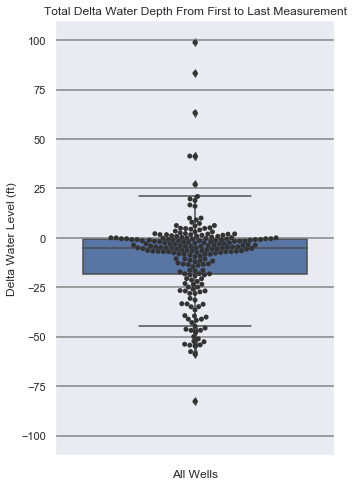

In [45]:
plt.figure(figsize = (5,8))
ax=sns.boxplot(y="Total_Delta", data=df_merge)
ax = sns.swarmplot(y="Total_Delta", data=df_merge, color=".2")
plt.xlabel('All Wells')
plt.ylabel('Delta Water Level (ft)')
plt.title('Total Delta Water Depth From First to Last Measurement')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(25, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(75, color ='gray')
ax.axhline(-25, color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-75, color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

df_merge.groupby(['well']).Total_Delta.describe().reset_index()

# Change in Water Depth for Well Sites Sorted by Aquifer Type
There are 189 wells measured in unconfined aquifers vs. 31 wells measured from confined aquifers.  Wells show a decrease in water levels from 1980 to 2020 of 12.2 to 0.8 ft for confined and unconfined aquifers, respectively.  

,AquiferType,count,mean,std,min,25%,50%,75%,max
0,CONFINED,30.0,-0.754667,22.410578,-47.82,-8.8525,-2.765,1.5225,98.8
1,UNCONFINED,182.0,-10.867033,20.769370,-82.74,-20.3125,-5.480,-0.5050,83.2


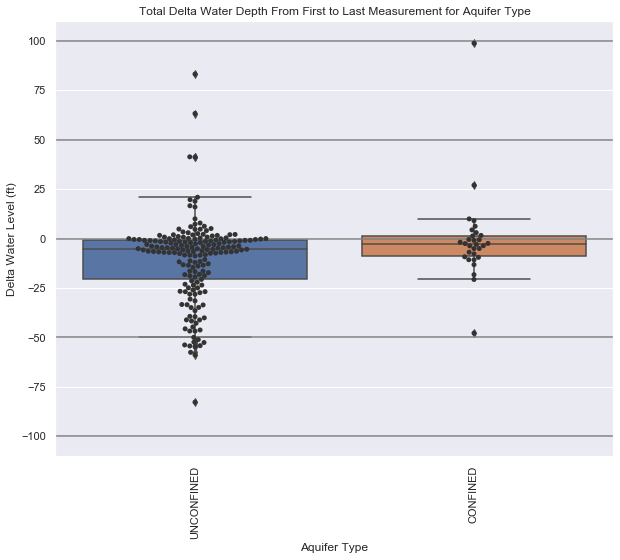

In [46]:
plt.figure(figsize = (10,8))
ax=sns.boxplot(y="Total_Delta",x ="AquiferType", data=df_merge)
ax = sns.swarmplot(x="AquiferType", y="Total_Delta", data=df_merge, color=".2")
plt.xlabel('Aquifer Type')
plt.ylabel('Delta Water Level (ft)')
plt.title('Total Delta Water Depth From First to Last Measurement for Aquifer Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

aquifer_type= df_merge.groupby(['AquiferType']).Total_Delta.describe().reset_index()
aquifer_type

Change in Water Depth for Well Sites Sorted by Aquifer System

,NatAqfrDesc,count,mean,std,min,25%,50%,75%,max
0,Colorado Plateaus aquifers,22.0,3.357273,29.603902,-54.32,-6.0825,0.365,9.7275,83.20
1,Denver Basin aquifer system,9.0,8.466667,34.784513,-20.69,-5.0600,-0.480,4.3800,98.80
2,High Plains aquifer,86.0,-18.867558,22.736197,-82.74,-38.6325,-13.120,-3.0100,41.19
3,Rio Grande aquifer system,95.0,-5.556737,9.043364,-34.90,-8.8150,-3.700,-0.8950,41.34


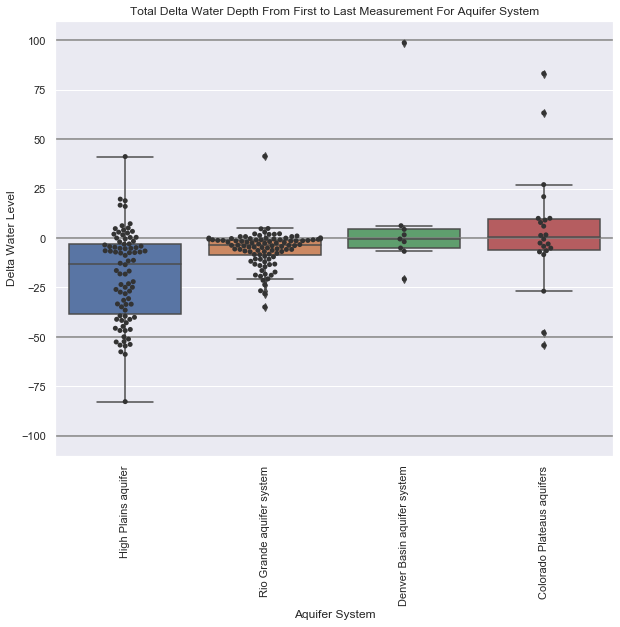

In [47]:
plt.figure(figsize = (10,8))

median_order = df_merge.groupby(by=['NatAqfrDesc'])['Total_Delta'].median().sort_values().index

ax=sns.boxplot(y="Total_Delta",x ="NatAqfrDesc", data=df_merge, order=median_order)
ax = sns.swarmplot(x="NatAqfrDesc", y="Total_Delta", data=df_merge, order=median_order, color=".2")
plt.xlabel('Aquifer System')
plt.ylabel('Delta Water Level')
plt.title('Total Delta Water Depth From First to Last Measurement For Aquifer System')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

aqfr_sys= df_merge.groupby(['NatAqfrDesc']).Total_Delta.describe().reset_index()
aqfr_sys

# Change in Water Depth for Well Sites, Sorted by Aquifer Formation
With an mean of -21.0 ft, the Ogallala aquifer shows the greatest decrease in water levels through time. The Fruitland, San Jose and Arapahoe Conglomerate also show significant decreases, but only a few well sites sample from these formations.  Wells measured from the Cenozoic Erathem number 96, show a moderate decrease of -5.5 ft.  


,LocalAquiferName,count,mean,std,min,25%,50%,75%,max
10,Ogallala aquifer,86.0,-18.867558,22.736197,-82.74,-38.6325,-13.120,-3.0100,41.19
6,Fruitland Aquifer,1.0,-8.400000,NaN,-8.40,-8.4000,-8.400,-8.4000,-8.40
11,San Jose Aquifer,1.0,-6.410000,NaN,-6.41,-6.4100,-6.410,-6.4100,-6.41
0,Arapahoe Conglomerate Member of Laramie Formation,3.0,-5.596667,13.295166,-20.69,-10.5850,-0.480,1.9500,4.38
1,Cenozoic Erathem,95.0,-5.556737,9.043364,-34.90,-8.8150,-3.700,-0.8950,41.34
8,Lower Piceance Basin Aquifer,5.0,-3.066000,27.661627,-47.82,-2.9900,-0.590,9.0600,27.01
7,Laramie Formation,1.0,-1.860000,NaN,-1.86,-1.8600,-1.860,-1.8600,-1.86
5,Fox Hills Formation,2.0,0.585000,7.983236,-5.06,-2.2375,0.585,3.4075,6.23
3,Dawson Arkose,1.0,1.620000,NaN,1.62,1.6200,1.620,1.6200,1.62
12,Upper Piceance Basin Aquifer,10.0,5.758000,23.783486,-26.88,-4.8775,-0.610,9.4425,63.25


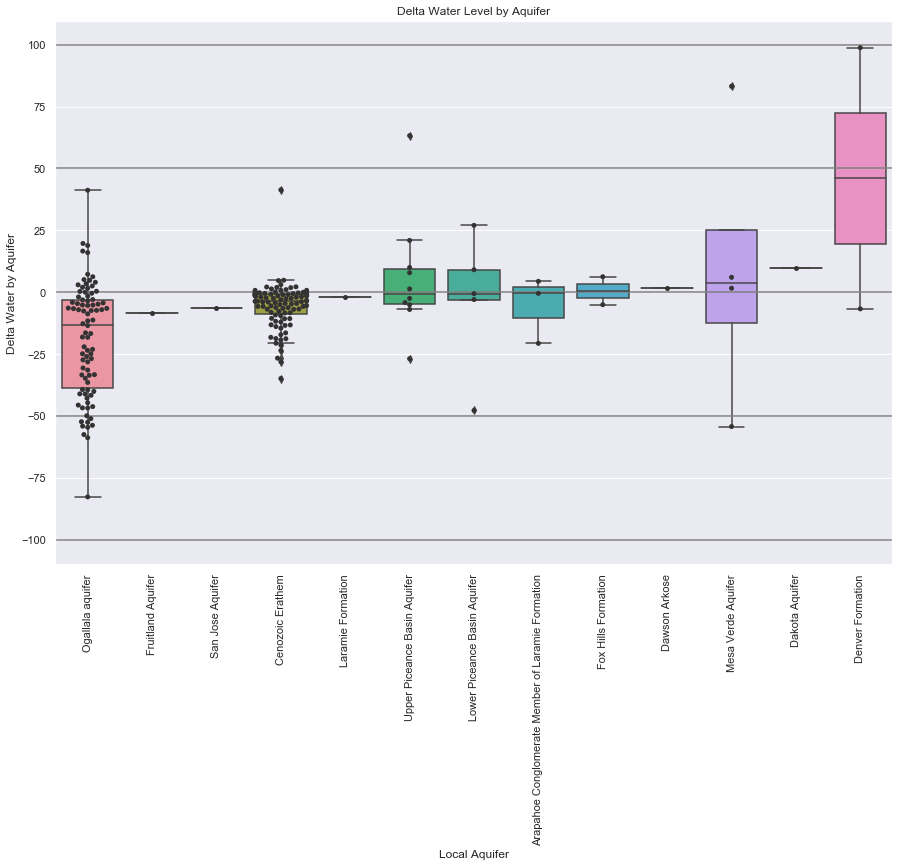

In [48]:

plt.figure(figsize = (15,10))

median_order= df_merge.groupby(by =['LocalAquiferName'])['Total_Delta'].median().sort_values().index

ax =sns.boxplot(x ="LocalAquiferName", y="Total_Delta", data=df_merge, order=median_order)
ax = sns.swarmplot(x="LocalAquiferName", y="Total_Delta", data=df_merge, order=median_order, color=".2")
plt.xlabel('Local Aquifer')
plt.ylabel('Delta Water by Aquifer')
plt.title('Delta Water Level by Aquifer')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

aqfr_formation= df_merge.groupby(['LocalAquiferName']).Total_Delta.describe().reset_index()
aqfr_formation.sort_values(by='mean', ascending= True)


# Change in Water Depth for Well Sites, by County
Wells in the agricultrual rich areas of easter colorado show significant decrease in water levels through time.  Most noteably, wells from Baca, Phillips, and Yuma Counties show a mean change of -40.7, -30.2, and -28.7 ft through from 1980-2020.  These wells are nearly exclusively located in the Ogallala aquifer.  


,CountyNm,count,mean,std,min,25%,50%,75%,max
14,Phillips County,8.0,-30.242500,19.654271,-54.62,-47.6025,-28.820,-15.7025,-2.98
21,Yuma County,20.0,-28.698000,16.733393,-54.16,-41.2750,-30.875,-16.8675,1.60
3,Cheyenne County,6.0,-23.635000,36.723793,-82.74,-41.3050,-16.130,-1.6200,19.67
20,Washington County,15.0,-23.013333,24.573415,-58.83,-48.6700,-7.100,-3.8100,4.00
2,Baca County,3.0,-21.803333,13.361648,-31.49,-29.4250,-27.360,-16.9600,-6.56
9,Kit Carson County,20.0,-13.716500,19.738361,-57.55,-31.3150,-6.390,0.8950,15.99
19,Sedgwick County,3.0,-9.843333,2.761781,-11.60,-11.4350,-11.270,-8.9650,-6.66
1,Archuleta County,1.0,-8.400000,NaN,-8.40,-8.4000,-8.400,-8.4000,-8.40
18,Saguache County,17.0,-8.322353,8.220366,-26.68,-10.7400,-5.550,-3.6100,3.01
17,Rio Grande County,17.0,-8.294706,7.397771,-21.38,-13.1800,-5.750,-1.3800,-0.28


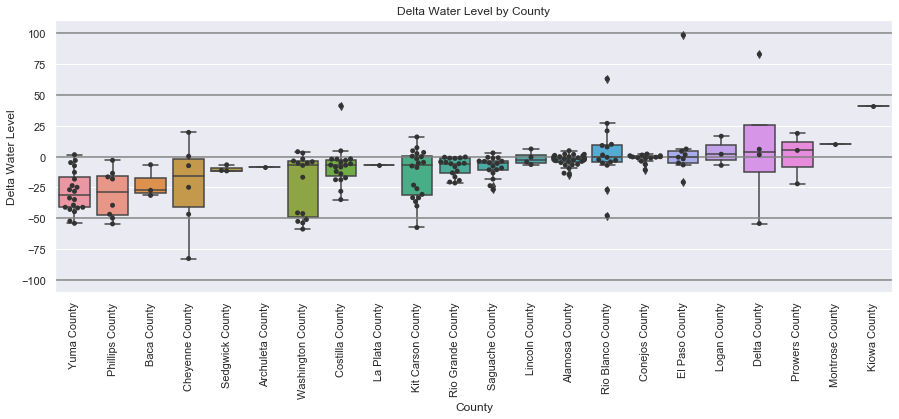

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize = (15,5))
median_order= df_merge.groupby(by =['CountyNm'])['Total_Delta'].median().sort_values().index
ax=sns.boxplot(y="Total_Delta",x ="CountyNm", data=df_merge, order = median_order)
ax = sns.swarmplot(x="CountyNm", y="Total_Delta", data=df_merge, order = median_order, color=".2")
plt.xlabel('County')
plt.ylabel('Delta Water Level')
plt.title('Delta Water Level by County')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')

county= df_merge.groupby(['CountyNm']).Total_Delta.describe().reset_index()
county.sort_values('mean', ascending=True)
# county.head(30)


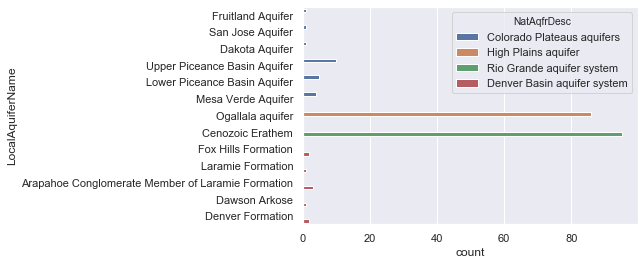

In [50]:

count_table = pd.crosstab(df_merge["NatAqfrDesc"], df_merge["LocalAquiferName"])
count_table
                    
# # Plot counts for each combination of levels.
sns.countplot(y="LocalAquiferName", hue="NatAqfrDesc", data=df_merge,)
plt.show()

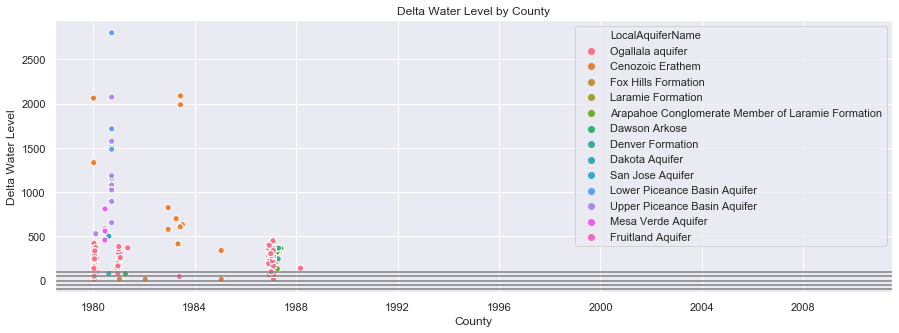

In [51]:
import seaborn as sns
# from matplotlib import pyplot as plt

plt.figure(figsize = (15,5))
# median_order= df_merge.groupby(by =['CountyNm'])['Total_Delta'].median().sort_values().index
ax=sns.scatterplot(y="WellDepth",x ="datestart", hue = 'LocalAquiferName', data=df, )
# ax = sns.swarmplot(x="CountyNm", y="Total_Delta", data=df_merge, order = median_order, color=".2")
plt.xlabel('County')
plt.ylabel('Delta Water Level')
plt.title('Delta Water Level by County')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.axhline(0, color ='gray')
ax.axhline(50,color ='gray')
ax.axhline(-50,color ='gray')
ax.axhline(-100,color ='gray')
ax.axhline(100,color ='gray')


# Summary
In summary, based on water level values reported by the National Ground Water Monitoring Network, mean ground water levels have decreased by ~10' from 1980 to 2020.  The greatest decrease in ground water levels has taken place in wells measured in the Ogallala aquifer and located counties of eastern Colorado.  The economy of these counties is mostly derived from agriculture, which, in most of the western United States relies heavily on irrigation to support crop yield. In these areas it is critical to continue to monitor water levels and employ water conservation methods to assure future economic and resource sustainability.  

In [52]:
# county_group = df.groupby([pd.Grouper(key = 'DateEdit', freq='2Y'), 'AquiferType']).delta_base_level.mean().reset_index()
df_5 =pd.DataFrame({"10yr_mean":"","10yr_min":"","10yr_max":"","10yr_count":""}, index = df["LocalAquiferName"]
# f = pd.DataFrame({'A': [11, 21, 31],
#                    'B': [12, 22, 32],
#                    'C': [13, 23, 33]},
#                   index=['ONE', 'TWO', 'THREE'])
df_5["10yr_mean"] = df.groupby([pd.Grouper(key = 'DateEdit', freq
                                           \= '10Y'), 'LocalAquiferName']).delta_base_level.mean()
df_5["10yr_min"] = df.groupby([pd.Grouper(key = 'DateEdit', freq = '10Y'), 'LocalAquiferName']).delta_base_level.min()
df_5["10yr_max"] = df.groupby([pd.Grouper(key = 'DateEdit', freq = '10Y'), 'LocalAquiferName']).delta_base_level.max()
df_5["10yr_count"] = df.groupby([pd.Grouper(key = 'DateEdit', freq = '10Y'), 'LocalAquiferName']).delta_base_level.count()

df_5.head(50)

SyntaxError: invalid syntax (<ipython-input-52-a9654a7bea37>, line 7)

In [ ]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

df_merge

In [ ]:
# Extract the data we're interested in
lat = df_merge['DecLatVa'].values
lon = df_merge['DecLongVa'].values
delta_water_level = df_merge['Total_Delta'].values
# area = cities['area_total_km2'].values

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=40.9, lon_0=-108.9,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(delta_water_level), 
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm delta_water_level})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [ ]:
df_5 = df.copy()

